## Observations

1. **Tumors treated with Capomulin decreased in volume the most** compared to the tumors treated by the other drugs. Getting treated by Infubinol or Ketapril, visually, was not too different from tumors "treated" with the placebo.
2. **Capomulin also had the least amount of metastatic spread.** The placebo still had the most spread compared to Infubinol and Ketapril, which can show some effectiveness of the two drugs, but still not as comparable to the Capomulin.
3. **Survival rate was highest among mice treated with Capomulin.** Interestingly, **those treated with Infubinol had the lowest survival rate by the end of the 45-day period.** Since the placebo was observed to be least effective in reducing tumor volume or metastatic spread, one might expect that survival rate would be lowest with the placebo, but that is not the case within this study. Perhaps there is something in the Infubinol that causes some negative side effects within the mice over time to cause this lower survival rate.

In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
#open and read csv files
clinicaltrial_data = pd.read_csv('./Instructions/Pymaceuticals/data/clinicaltrial_data.csv')
mouse_drug_data = pd.read_csv('./Instructions/Pymaceuticals/data/mouse_drug_data.csv')

In [3]:
# Merge our two data frames together
combined_clinical_data = pd.merge(clinicaltrial_data, mouse_drug_data, on="Mouse ID")
combined_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response To Treatment

In [4]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_groupby = combined_clinical_data.groupby(["Drug","Timepoint"])
# # Convert to DataFrame
drug_df = pd.DataFrame(drug_groupby.mean()["Tumor Volume (mm3)"])
drug_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_df = pd.DataFrame(drug_groupby.sem()["Tumor Volume (mm3)"])
sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
drug_df_reformat = drug_df.unstack(0)
#.unstack from doc: Pivot a level of the (necessarily hierarchical) index labels,
#returning a DataFrame having a new level of column labels whose inner-most
#level consists of the pivoted index labels.
drug_df_reformat

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [7]:
sem_df_reformat = sem_df.unstack(0)
sem_df_reformat

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   
25                  0.881642  0.439356  0.550315  0.755413  0.813706   
30                  0.934460  0.490620  0.631061  0.934121  0.975496   
35                  1.052241  0.692248  0.984155  1.127867  1.013769   
40                  1.223608  0.708505  1.055220  1.158449  1.118567   
45                  1.223977  0.902358  1.144427  1.453186  1.416363   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182  
25         1.034872  0.577401  0.746991  0.741922  0.602513  
30         1.218231  0.746045  0.864906  0.899548  0.800043  
35         1.287481  1.084929  0.967433  1.003186  0.881426  
40         1.370634  1.564779  1.128445  1.410435  0.998515  
45         1.351726  1.888586  1.226805  1.576556  1.003576

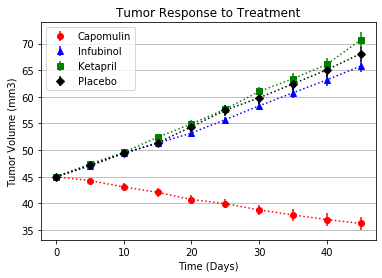

In [8]:
#Your objective is to analyze the data to show how four treatments
#(Capomulin, Infubinol, Ketapril, and Placebo) compare.
# Generate the Plot (with Error Bars)
# ax.errorbar(x_axis_time, means, standard_errors, fmt="o")
fig, ax = plt.subplots()
x_axis_time = range(0,46,5)

#Capomulin
means_capo = drug_df_reformat['Tumor Volume (mm3)']['Capomulin']
se_capo = sem_df_reformat['Tumor Volume (mm3)']['Capomulin']
plt.plot(x_axis_time, means_capo,color='red',linestyle='dotted')
ax.errorbar(x_axis_time, means_capo, se_capo,fmt="o",color='red',ecolor='red', label='Capomulin')

#Infubinol
means_infu = drug_df_reformat['Tumor Volume (mm3)']['Infubinol']
se_infu = sem_df_reformat['Tumor Volume (mm3)']['Infubinol']
plt.plot(x_axis_time, means_infu,color='blue',linestyle='dotted')
ax.errorbar(x_axis_time, means_infu, se_infu,fmt="^",color='blue',ecolor='blue', label='Infubinol')

#Ketapril
means_keta = drug_df_reformat['Tumor Volume (mm3)']['Ketapril']
se_keta = sem_df_reformat['Tumor Volume (mm3)']['Ketapril']
plt.plot(x_axis_time, means_keta,color='green',linestyle='dotted')
ax.errorbar(x_axis_time, means_keta, se_keta,fmt="s",color='green',ecolor='green',label='Ketapril')

#Placebo
means_placebo = drug_df_reformat['Tumor Volume (mm3)']['Placebo']
se_placebo = sem_df_reformat['Tumor Volume (mm3)']['Placebo']
plt.plot(x_axis_time, means_placebo,color='black',linestyle='dotted')
ax.errorbar(x_axis_time, means_placebo, se_placebo,fmt="D",color='black',ecolor='black',label='Placebo')

#legend
plt.legend()

#labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis='y')

#save
plt.savefig('./Tumor_Response_to_Treatment.png')
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_groupby = combined_clinical_data.groupby(["Drug","Timepoint"])
# # Convert to DataFrame
metastatic_df = pd.DataFrame(metastatic_groupby.mean()["Metastatic Sites"])
# Preview DataFrame
metastatic_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
sem_met_df = pd.DataFrame(metastatic_groupby.sem()["Metastatic Sites"])
# Preview DataFrame
sem_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_df_rf = metastatic_df.unstack(0)
metastatic_df_rf.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [12]:
sem_met_df_rf = sem_met_df.unstack(0)
sem_met_df_rf

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25                0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30                0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35                0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40                0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45                0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

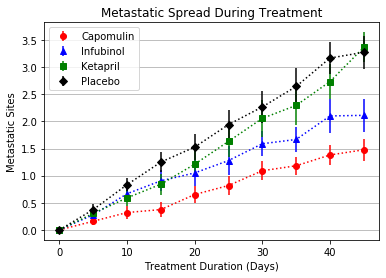

In [13]:
# Generate the Plot (with Error Bars)
# ax.errorbar(x_axis_time, means, standard_errors, fmt="o")
fig, ax = plt.subplots()
x_axis_time = range(0,46,5)

#Capomulin
means_meta_capo = metastatic_df_rf['Metastatic Sites']['Capomulin']
se_meta_capo = sem_met_df_rf['Metastatic Sites']['Capomulin']
plt.plot(x_axis_time, means_meta_capo,color='red',linestyle='dotted')
ax.errorbar(x_axis_time, means_meta_capo, se_meta_capo,fmt="o",color='red',ecolor='red', label='Capomulin')

# #Infubinol
means_meta_infu = metastatic_df_rf['Metastatic Sites']['Infubinol']
se_meta_infu = sem_met_df_rf['Metastatic Sites']['Infubinol']
plt.plot(x_axis_time, means_meta_infu,color='blue',linestyle='dotted')
ax.errorbar(x_axis_time, means_meta_infu, se_meta_infu,fmt="^",color='blue',ecolor='blue', label='Infubinol')

# #Ketapril
means_meta_keta = metastatic_df_rf['Metastatic Sites']['Ketapril']
se_meta_keta = sem_met_df_rf['Metastatic Sites']['Ketapril']
plt.plot(x_axis_time, means_meta_keta,color='green',linestyle='dotted')
ax.errorbar(x_axis_time, means_meta_keta, se_meta_keta,fmt="s",color='green',ecolor='green', label='Ketapril')

# #Placebo
means_meta_placebo = metastatic_df_rf['Metastatic Sites']['Placebo']
se_meta_placebo = sem_met_df_rf['Metastatic Sites']['Placebo']
plt.plot(x_axis_time, means_meta_placebo,color='black',linestyle='dotted')
ax.errorbar(x_axis_time, means_meta_placebo, se_meta_placebo,fmt="D",color='black',ecolor='black', label='Placebo')

#legend
plt.legend()

#labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(axis='y')

#save
plt.savefig('./Metastatic_Spread.png')
plt.show()

## Survival Rates

In [14]:
combined_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [15]:
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_groupby = combined_clinical_data.groupby(["Drug","Timepoint"])
mice_df = pd.DataFrame(mice_groupby.count()['Mouse ID'])
mice_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [16]:
# Minor Data Munging to Re-Format the Data Frames
mice_df_rf = mice_df.unstack(0)
mice_df_rf
# Preview the Data Frame

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

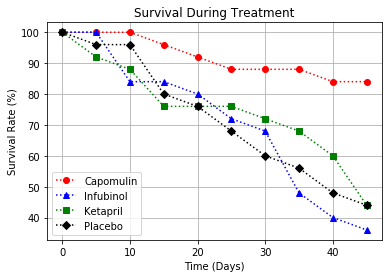

In [17]:
# Generate the Plot (Accounting for percentages)
x_axis_time = range(0,46,5)

#Capomulin
#y axis
capo_mouse_total = mice_df_rf["Mouse ID"]["Capomulin"][0]
mouse_capo = mice_df_rf["Mouse ID"]["Capomulin"]
y_capo = (mouse_capo/capo_mouse_total)*100
plt.plot(x_axis_time, y_capo,marker='o',color='red',linestyle='dotted',label='Capomulin')

#Infubinol
infu_mouse_total = mice_df_rf["Mouse ID"]["Infubinol"][0]
mouse_infu = mice_df_rf["Mouse ID"]["Infubinol"]
y_infu = (mouse_infu/infu_mouse_total)*100
plt.plot(x_axis_time, y_infu,marker='^',color='blue',linestyle='dotted',label='Infubinol')

#Ketapril
keta_mouse_total = mice_df_rf["Mouse ID"]["Ketapril"][0]
mouse_keta = mice_df_rf["Mouse ID"]["Ketapril"]
y_keta = (mouse_keta/keta_mouse_total)*100
plt.plot(x_axis_time, y_keta,marker='s',color='green',linestyle='dotted',label='Ketapril')

#Placebo
placebo_mouse_total = mice_df_rf["Mouse ID"]["Placebo"][0]
mouse_placebo = mice_df_rf["Mouse ID"]["Placebo"]
y_placebo = (mouse_placebo/placebo_mouse_total)*100
plt.plot(x_axis_time, y_placebo,marker='D',color='black',linestyle='dotted',label='Placebo')

#legend
plt.legend()

#labels
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

#save
plt.savefig('./Survival_During_Treatment.png')
plt.show()

## Summary Bar Graph

In [18]:
drug_df_reformat

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [19]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
# Calculate the percent changes for each drug

#45 original tumor volume for all - (new - old)/old

capo_change = ((drug_df_reformat["Tumor Volume (mm3)"]["Capomulin"][45] - 45)/45)*100
infu_change = ((drug_df_reformat["Tumor Volume (mm3)"]["Infubinol"][45] - 45)/45)*100
keta_change = ((drug_df_reformat["Tumor Volume (mm3)"]["Ketapril"][45] - 45)/45)*100
placebo_change = ((drug_df_reformat["Tumor Volume (mm3)"]["Placebo"][45] - 45)/45)*100

# Display the data to confirm
print(capo_change)
print(infu_change)
print(keta_change)
print(placebo_change)

-19.475302667894155
46.12347172785184
57.02879468660604
51.29796048315153


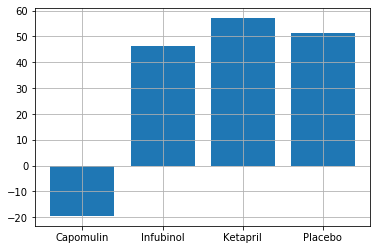

In [20]:
# Store all Relevant Percent Changes into a Tuple

changes_dict = ({"Drug":['Capomulin','Infubinol','Ketapril','Placebo'],
                 "% Tumor Volume Change":[capo_change, infu_change,keta_change,placebo_change]
    
})

changes_df = pd.DataFrame(changes_dict)
changes_df

plt.bar(changes_df['Drug'],changes_df['% Tumor Volume Change'])

plt.savefig('./Summary_Bar_Graph_unfinished.png')
plt.grid()

In [21]:
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure